# Sorting Algorithms
in this notebook we analyze two algorithms:

    insertion_sort
    quick_sort

we will show the 3 asymptotic case analysis.
First we will tests the gen_random_n/u_array function

In [2]:
import os, sys
sys.path = [os.path.abspath("../")] + sys.path
from sort import *
from utils import *
import matplotlib.pyplot as plt

N = 100
x = np.arange(N)

plt.style.use('seaborn')
plt.plot(x,gen_random_u_array(N),label='uniform array')
plt.plot(x,gen_random_n_array(N),label='normal array')

plt.xlabel('n')
plt.ylabel('values')
plt.title('random array')
plt.legend()
plt.show()

<Figure size 800x550 with 1 Axes>

## timeit module

A non <strong>default_timer()</strong> approach.

### timeit(number=1000000)
From the Python documentation: <br>
Time number executions of the main statement. This executes the setup statement once, and then returns the time it takes to execute the main statement a number of times, measured in seconds as a float. The argument is the number of times through the loop, defaulting to one million. The main statement, the setup statement and the timer function to be used are passed to the constructor.
##### Useful note 
    Note By default, timeit() temporarily turns off garbage collection during the timing. The advantage of this approach is that it makes independent timings more comparable. The disadvantage is that GC may be an important component of the performance of the function being measured. If so, GC can be re-enabled as the first statement in the setup string. For example:
    
  <code> timeit.Timer('for i in range(10): oct(i)', 'gc.enable()').timeit() </code>
   
### repeat(repeat=5, number=1000000)
Call <strong>timeit()</strong> a few times.

This is a convenience function that calls the <strong>timeit()</strong> repeatedly, returning a list of results. The first argument specifies how many times to call <strong>timeit()</strong>. The second argument specifies the number argument for <strong>timeit()</strong>.
##### A more userful note
    Note It’s tempting to calculate mean and standard deviation from the result vector and report these. However, this is not very useful. In a typical case, the lowest value gives a lower bound for how fast your machine can run the given code snippet; higher values in the result vector are typically not caused by variability in Python’s speed, but by other processes interfering with your timing accuracy. So the min() of the result is probably the only number you should be interested in. After that, you should look at the entire vector and apply common sense rather than statistics.
    
from that we can say that the function that we are searching is more or less like this:
<br>
<code>
import timeit
setup = '''
import random

random.seed('algorithm-and-data-structure-reports')
s = gen_random_u_array({})
'''.format(1_000)
 min(timeit.Timer('a=list(s) insertion_sort(a)', setup=setup).repeat(7, 100) </code>
 <br>
We create a fresh copy of the array when we repeat the timing.
Alternative to the copy syntax:
<code>
    a = s[:]
    a = s.copy()
    ...
</code>
However this is a bad approch, first with this method we are also timing the copy of the array and can resolve this by setting repeat and number parameters to 100 and 1 respectively and eliminate the copy instruction. <br>
<code>
    min(timeit.Timer('insertion_sort(s)', setup=setup).repeat(100, 1)
</code>
Second we need to enable the garbage collector so that we can get faster times.
We do that in the setup string as is written in the documentation:

    Note: By default, timeit() temporarily turns off garbage collection during the timing. The advantage of this approach is that it makes independent timings more comparable. The disadvantage is that GC may be an important component of the performance of the function being measured. If so, GC can be re-enabled as the first statement in the setup string.


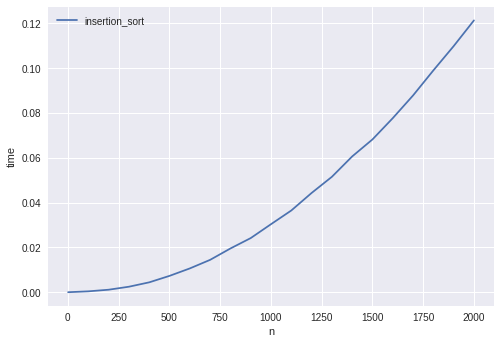

In [13]:
from utils import (np) 
import matplotlib.pyplot as plt

times = []
r = np.arange(1,2_100,100)
for i in r:
    setup = """
from sort import (insertion_sort)
from utils import (np,gen_random_u_array)
np.random.seed(31415)
s = gen_random_u_array({})
gc.enable()
    """.format(i)
    times.append(evaluate(stmt='insertion_sort(s)', setup=setup, repeat=10))

plt.style.use('seaborn')
plt.plot(r, times, label="insertion_sort")
plt.xlabel('n')
plt.ylabel('time')
plt.legend()
plt.show()

The same thing can be done with quick_sort.

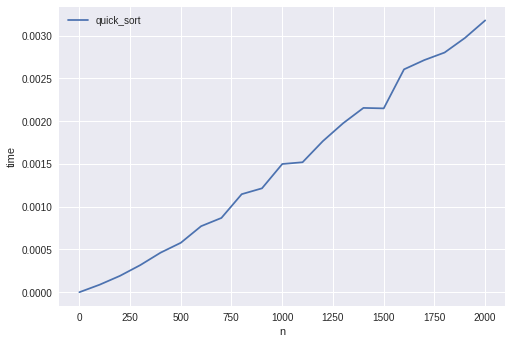

In [28]:
from utils import (np) 
import matplotlib.pyplot as plt

times = []
r = np.arange(1,2_100,100)
for i in r:
    setup = """
from sort import (quick_sort)
from utils import (np,gen_random_n_array)
np.random.seed(31415)
s = gen_random_n_array({})
gc.enable()
    """.format(i)
    times.append(evaluate(stmt='quick_sort(s,0,len(s)-1)', setup=setup, repeat=10))

plt.style.use('seaborn')
plt.plot(r, times, label="quick_sort")
plt.xlabel('n')
plt.ylabel('time')
plt.legend()
plt.show()

The best case for Quicksort using last element as pivot is the post-order traversal of the balanced binary search tree. For example:

         5
       /   \
      3      7
     / \    / \
    1   4  6   8
The post-order traversal of this binary tree is

1 4 3 6 8 7 5

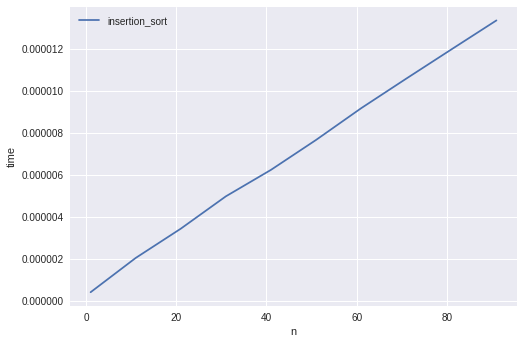

In [3]:
from utils import (np) 
import matplotlib.pyplot as plt

times = []
r = np.arange(1,100,10)
for i in r:
    setup = """
from sort import (insertion_sort)
from utils import (np,gen_sorted_array)
np.random.seed(31415)
s = gen_sorted_array({})
gc.enable()
    """.format(i)
    times.append(evaluate(stmt='insertion_sort(s)', setup=setup, repeat=10))

plt.style.use('seaborn')
plt.plot(r, times, label="insertion_sort")
plt.xlabel('n')
plt.ylabel('time')
plt.legend()
plt.show()
times_ins = times

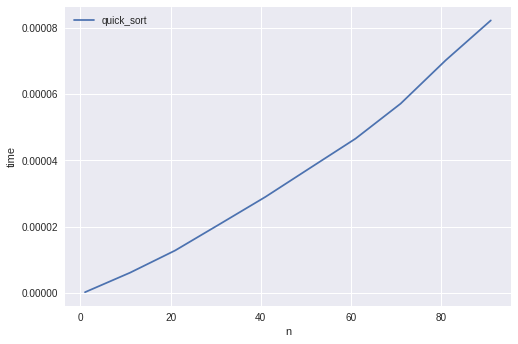

In [4]:
from utils import (np) 
import matplotlib.pyplot as plt

times = []
r = np.arange(1,100,10)
for i in r:
    setup = """
from sort import (quick_sort)
from utils import (np,gen_random_n_array)
from tree import (RedBlackTree)
np.random.seed(31415)
s = gen_random_n_array({})
balanced_tree = RedBlackTree()
for i in s:
    balanced_tree.insert(i)
s = balanced_tree.postorder()
gc.enable()
    """.format(i)
    times.append(evaluate(stmt='quick_sort(s,0,len(s)-1)', setup=setup, repeat=10))

plt.style.use('seaborn')
plt.plot(r, times, label="quick_sort")
plt.xlabel('n')
plt.ylabel('time')
plt.legend()
plt.show()
times_quick = times

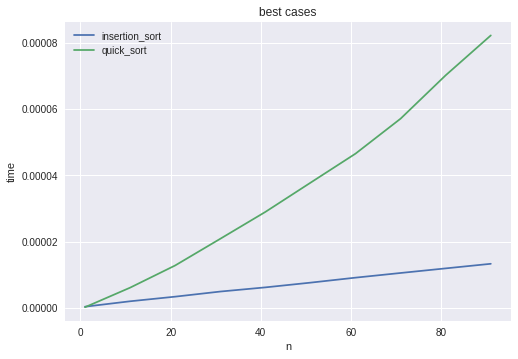

In [5]:
plot_compare(r, times_ins, times_quick, "insertion_sort", "quick_sort", "best cases", 'n', 'time') # for best cases